![](fig/univ.png)

# AI-2: Convolutional Neural Network
## Homework 1: Artificial Neural Networks, Model Interpretation, and Regularization

**AI2 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 100

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [2]:
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import keras
# TensorFlow and tf.keras
import tensorflow as tf
%matplotlib inline

### INSTRUCTIONS


- This homework is a jupyter notebook. Download and work on it on your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropraite plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### Chinmay Jain

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [50 pts]: Model interpretation and predictive intervals in NN**](#part1)
  - [Overview and Data Description](#part1intro)
  - [Questions](#part1questions)
  - [Solutions](#part1solutions)


- [**PART 2 [50 pts]: Kannada MNIST Kaggle competition**](#part2)
  - [Problem Statement](#part2intro)
  - [The Kannada MNIST Dataset](#part2about)
  - [Downloading the Data Files](#part2data)
  - [AI2-C1 Homework1 Kaggle Competition](#part2kaggle)
  - [Questions](#part2questions)
  - [Solutions](#part2solutions)


---

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h1> PART 1 [50 pts]: Model interpretation and predictive intervals in NN </h1> 

<br />


<a id="part1intro"></a>

<b> Overview and Data Description </b>
<br /><br />
[Return to contents](#contents)
<br />
In this problem, you will be building and interpreting models to predict whether a flight was delayed for its arrival based on features that could be measured as the flight takes off.  
We will also estimate the predictive intervals of the model using bootstrapping. We will utilize those predictive intervals to build a new kind of model: a model that refrains from making a prediction when it is not confident.  


The included variables are:
<br /><br />
**ARRIVAL_DELAY**: the difference between scheduled arrival and actual arrival, in minutes (positive is late, negative is early).
<br /><br />
**DISTANCE**: the distance between arrival and departure airports, in miles.
<br /><br />
**SCHEDULED_TIME**: the flight's scheduled travel time.
<br /><br />
**MONTH**: the month the flight took off, 1 = January, 2 = February, etc.
<br /><br />
**SCHED_DEP_HOUR**: the scheduled departure time (the hour of the day).
<br /><br />
**SCHED_ARR_HOUR**: the scheduled arrival time (the hour of the day).
<br /><br />
**FLIGHT_COUNT**: the number of flights flying out of that airport before noon on a typical day.
<br /><br />
**DAY_OF_WEEK**: the day of the week, 1 = Monday, 2 = Tuesday, etc.
<br /><br />
**ORIGIN_AIRPORT**: the airport the flight took off from.
<br /><br />
**DESTINATION_AIRPORT**: the airport the flight was scheduled to land at.
<br /><br />
For the airport codes, see: https://www.bts.gov/topics/airlines-and-airports/world-airport-codes

To sucessfully complete this part, you will proceed by fitting a NN model, evaluating its accuracy, interpreting the predictors' importance, and finally evaluating the predictive intervals.
<br /><br />
**NOTE:** The observations were sampled so that roughly half of the observations were delayed and half of the observations were not delayed.

</div> 

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h2>PART 1: Questions</h2> 
<br /><br />
    
[Return to contents](#contents)

<br /><br />
**1.1.1 [5 points]**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). This is going to be the response variable for the rest of this question. 
<br /><br />
**1.1.2 [5 points]** Preprocess the data: one-hot-encode the non-numeric categorical variables, deal with missing values if there are any, scale your data, and split the data into training and test sets (use an 80/20 split with `random_state=111`). Print the resulting shapes of your $X$ and $y$ dataframes for both your train and your test sets.
<br /><br />
**1.2 [5 points]** Fit an artificial neural network model using all predictors (name this model `NN_model`).  Use a dense feed-forward network with two hidden layers with 15 nodes in each hidden layer. For this network, use appropriate activation functions for each layer, select an appropriate loss function and optimizer, specify a validation split of 0.2, train for an appropriate number of epochs based on the results of your training and validation accuracy plot, and feel free to use the default batch size while training. Plot the training accuracy and validation accuracy as a function of epochs from your `NN_model` training history. Evaluate the `NN_model` model on both train and test, and print out the resulting train and test accuracies.
<br /><br />
**1.3 [10 points]** To begin our interpretation of the resulting `NN_model`, we will first use a "proxy model" that we know how to interpret and train it on our `NN_model` training predictions.

<br /><br />
- **1.3.1** For this we need to modify our training set. First, generate a set of `NN_model` class predictions for the training set. These training predictions will be used to form a revised training dataset for our proxy model: (a) use all of the same $X$ values used by `NN_model` for our $X$ train and (b) replace the actual response values $y$ with the predicted $\hat{y}$ values generated by the fitted `NN_model`.

<br /><br />
- **1.3.2** Next, fit a logistic regression model using your revised training dataset from 1.3.1 (name this model `logreg`). Use ridge-like regularization. Print the `logreg` test accuracy to confirm that it is similar to what we saw for our `NN_model` test accuracy in 1.2. You may need to adjust `C` in order to achieve a similar accuracy.

<br /><br />
- **1.3.3** Now use sklearn's `permutation_importance` class (already included in this notebook's imports) to compute the feature importance using the `logreg` model.
<br />
  - Read the official documentation for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=The%20permutation%20feature%20importance%20is,model%20depends%20on%20the%20feature.) as well as [here](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) to learn how it works.
<br />
  - You can use the default number of `n_repeats` and your estimator's default `scorer`. To speed up the time it takes to run your permutations, you can try setting `n_jobs=-1` to take full advantage of all of your available processor cores.
<br />
  - Measure the **relative** variable importance (i.e. as a proportion of the variable importance of the most important variable identified by `permutation_importance`) and generate a barplot illustrating the relative variable importances for the top-10 most important predictors identified using `permutation_importance`.
<br /><br />

**1.4 [10 points]** Another way to interpret the  `NN_model` is by examining the response as a function of any of the predictors. Particularly, we will select from features often found most significant from the analysis above. **For all 1.4 plots below**, for ease of interpretation, **please be certain to** display all predictors on their original scales. 
<br /><br />

   - **1.4.1** Set all predictors to their means/modes except for `SCHED_DEP_HOUR`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` on the data from the **training set**. Interpret what you see in 2-4 sentences.
<br /><br />
 
   - **1.4.2** Set all predictors to their means/modes except for `SCHED_DEP_HOUR` and `FLIGHT_COUNT`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `FLIGHT_COUNT` from the training set (see the question 1.4 "HINT" below).

<br /><br />
   - **1.4.3**   Set all predictors to their means/modes except for except for `SCHED_DEP_HOUR` and `SCHED_ARR_HOUR`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `SCHED_ARR_HOUR` from the training set.

<br /><br />
   - **1.4.4** Set all predictors to their means/modes except for except for `SCHED_DEP_HOUR` and `DISTANCE`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `DISTANCE` from the training set. 
<br /><br />

  - **1.4.5** In 5-10 sentences, interpret what you have seen in 1.4.2, 1.4.3, and 1.4.4.
<br /><br />
**HINT:** For 1.4.2, 1.4.3, and 1.4.4, when you include `SCHED_DEP_HOUR` on one axis and your second predictor on the other axis, you can color your datapoints based on their corresponding predicted probabilities by using  the `c` and `cmap` arguments in `plt.scatter`. You can also add a labeled colorbar to your plot to make clear what those colors mean. Please refer to the matplotlib documentation for examples.
<br /><br />
    
**1.5 [5 points]**
    
<br /><br />
In this part, we will attempt to do model inference. Neural Networks have too many parameters, and therefore inference on all the parameters is intractable and meaningless. 
<br /><br />
Using the same network architecture as `NN_model` (layers, nodes, activations, etc.) and your scaled data from that model, create multiple training sets using bootstrapping and fit a separate neural network model to each bootstrapped set of data (a minimum of at least 50 bootstraps should be used). Predict the output on the test data for each model. Randomly select 8 test observations and on 8 subplots, plot the distribution of predicted probabilities (i.e. $n$ bootstrapped probabilites) with the 95% CI bounds clearly marked and reported in each subplot and the actual class of each observation included in each subplot's title for easy reference.
    <br /><br />
Interpret what you see in 3-5 sentences.
<br /><br />
    
**NOTE:** The code for this problem can take an extremely long time to execute. Please feel free to use the provided `progressbar` function below to visually track the progress of your bootstraps.
    
<br /><br />
    
**1.6 [10 points]**
    
<br /><br />
Using the probability distribution of the predictions obtained from the bootstrapped samples above, we can evaluate how "significant" our bagged (i.e. bootstrap-aggregated) prediction will be for each test observation.
<br /><br />
To accomplish this, you will first calculate the ratio of bootstrapped probabilities that cross the threshold value of $\hat{p}=0.5$. Let's call this ratio the **Posterior Prediction Ratio (PPR)**. When a bagged prediction's $PPR=0$, all predictions are compatible (i.e. all bootstrapped probabilities for that test observation are on the same side of $\hat{p}=0.5$). Likewise, when the $PPR=0.5$, half of the bootstrapped predictions for that test observation are $\hat{y}=0$, and the other half are $\hat{y}=1$. After calculating your $PPR$ values for all test observations, you should have $n=2000$ $PPR$ values (i.e. one for each test observation).
<br /><br />
Next, to get more accurate predictions, we can create an **abstain** model that will abstain from making a prediction for a particular observation if some defined threshold for significance (i.e. maximum $PPR$ value) is not met. (If you'd like to learn more about abstain models, you can read more [here](https://openreview.net/forum?id=rJxF73R9tX).)
<br /><br />
Let's explore how your resulting test accuracies might change by using your bootstrapped prediction results from question 1.5 for an **abstain bagging model** (i.e. a bootstrap aggregated model where some test observations are simply not predicted based on a given $PPR$ threshold). You can make your abstain model *stricter* by using smaller $PPR$ threshold values.
<br /><br />
- Print the test accuracy for your **bagging model** predictions from question 1.5 using predictions for all 2,000 of our test observations. 
<br /><br />
- Plot the test accuracies for an **abstain bagging model** using your predictions from question 1.5 as a function of increasing $PPR$.
<br /><br />
- Also, plot the proportion of test observations not abstained (i.e. the proportion of those predicted) for your **abstain bagging model** as a function of increasing $PPR$.
<br /><br />
- Interpret what you see in 3-5 sentences.
<br /><br />
    
**NOTE**: You should observe that as $PPR$ decreases (more confident predictions), you must also compromise on the number of points that your abstain model predicts confidently. 

</div>

<a id="part1solutions"></a>

## PART 1: Solutions

[Return to contents](#contents)


<div class='exercise-r'>  

**1.1**

</div>

In [97]:
# your code here 
data=pd.read_csv("data/flights.csv")
data.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,23.0,2586,342.0,9,7,15,240,3,SFO,JFK
1,10.0,1235,185.0,5,6,11,366,4,LAX,DFW
2,-7.0,184,76.0,4,17,18,172,7,BOS,LGA
3,68.0,862,148.0,7,19,21,260,7,IAH,DEN
4,24.0,236,71.0,3,20,21,266,2,LAS,LAX


In [98]:
data['DELAY_OR_NOT']=np.where(data['ARRIVAL_DELAY']>=15,1,0)

In [99]:
data.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DELAY_OR_NOT
0,23.0,2586,342.0,9,7,15,240,3,SFO,JFK,1
1,10.0,1235,185.0,5,6,11,366,4,LAX,DFW,0
2,-7.0,184,76.0,4,17,18,172,7,BOS,LGA,0
3,68.0,862,148.0,7,19,21,260,7,IAH,DEN,1
4,24.0,236,71.0,3,20,21,266,2,LAS,LAX,1


<div class='exercise-r'>  

**1.1.2**
    
</div>

In [100]:
# your code here
print(data.shape)

(10000, 11)


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
ARRIVAL_DELAY          10000 non-null float64
DISTANCE               10000 non-null int64
SCHEDULED_TIME         10000 non-null float64
MONTH                  10000 non-null int64
SCHED_DEP_HOUR         10000 non-null int64
SCHED_ARR_HOUR         10000 non-null int64
FLIGHT_COUNT           10000 non-null int64
DAY_OF_WEEK            10000 non-null int64
ORIGIN_AIRPORT         10000 non-null object
DESTINATION_AIRPORT    10000 non-null object
DELAY_OR_NOT           10000 non-null int32
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 820.4+ KB


In [102]:
categorical_variables=['ORIGIN_AIRPORT','DESTINATION_AIRPORT']
data=pd.get_dummies(data,prefix=['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])
data.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,DELAY_OR_NOT,ORIGIN_AIRPORT_10140,...,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,23.0,2586,342.0,9,7,15,240,3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,1235,185.0,5,6,11,366,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-7.0,184,76.0,4,17,18,172,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,862,148.0,7,19,21,260,7,1,0,...,0,0,0,0,0,0,0,0,0,0
4,24.0,236,71.0,3,20,21,266,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
x=data.drop(['DELAY_OR_NOT'],axis=1)
y=data.DELAY_OR_NOT
scale=StandardScaler()
x=scale.fit_transform(x)

In [104]:
print(x.shape)
print(x[0:5])


(10000, 811)
[[-0.03544991  2.90841033  2.65812507 ... -0.04587395 -0.020004
  -0.020004  ]
 [-0.27728914  0.67066961  0.56412496 ... -0.04587395 -0.020004
  -0.020004  ]
 [-0.59354044 -1.07016347 -0.88967129 ... -0.04587395 -0.020004
  -0.020004  ]
 [ 0.80168588  0.05284778  0.07063449 ... -0.04587395 -0.020004
  -0.020004  ]
 [-0.01684689 -0.98403281 -0.95635919 ... -0.04587395 -0.020004
  -0.020004  ]]


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)

In [106]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(8000, 811) (8000,)
(2000, 811) (2000,)


<div class='exercise-r'>  
    
**1.2**
    
</div>

In [107]:
NN_model = keras.Sequential()
NN_model.add(tf.keras.Input(shape=(811,)))
NN_model.add(tf.keras.layers.Dense(15, activation="relu"))
NN_model.add(tf.keras.layers.Dense(15, activation="relu"))
NN_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

print(NN_model.summary())

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 15)                12180     
_________________________________________________________________
dense_162 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 16        
Total params: 12,436
Trainable params: 12,436
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
# compile it and run it
# your code here 
NN_model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=NN_model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6407 - accuracy: 0.6616 - val_loss: 0.5525 - val_accuracy: 0.7244
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8014 - val_loss: 0.4440 - val_accuracy: 0.8050
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8766 - val_loss: 0.3550 - val_accuracy: 0.8419
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9203 - val_loss: 0.3317 - val_accuracy: 0.8606
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9422 - val_loss: 0.2966 - val_accuracy: 0.8938
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.9566 - val_loss: 0.2907 - val_accuracy: 0.9050
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9638 - val_loss: 0.2917 - val_accuracy: 0.9187

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9967 - val_loss: 0.4235 - val_accuracy: 0.9375
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9973 - val_loss: 0.4372 - val_accuracy: 0.9350
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.4222 - val_accuracy: 0.9394
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9972 - val_loss: 0.4332 - val_accuracy: 0.9406
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9973 - val_loss: 0.4422 - val_accuracy: 0.9394
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.4393 - val_accuracy: 0.9413
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.4390 - val_accuracy:

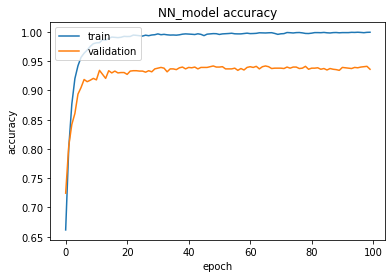

In [109]:
# plot train and val acc as  a function of epochs
# your code here
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('NN_model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [110]:
# primer to print: 
# print("NN_model_train_auc:", roc_auc_score(y_train, y_hat))
# your code here 
y_hat_1=NN_model.predict(x_train)
print("NN_model_train_auc:", roc_auc_score(y_train, y_hat_1))

NN_model_train_auc: 0.9971554966415164


In [111]:
# your code here
y_hat=NN_model.predict(x_test)
print("NN_model_test_auc:", roc_auc_score(y_test, y_hat))

NN_model_test_auc: 0.9800872184633422


In [112]:
print("NN_model_train_accuracy:",NN_model.evaluate(x_train,y_train))
print("NN_model_test_accuracy:",NN_model.evaluate(x_test,y_test))

250/250 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9869
NN_model_train_accuracy: [0.10305081307888031, 0.9868749976158142]
63/63 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.9360
NN_model_test_accuracy: [0.521920919418335, 0.9359999895095825]


<div class='exercise-r'>

**1.3**

</div>

In [113]:
# Fit the logistic regression model
# your code here
y_hat_1=np.where(y_hat_1>0.5,1,0)
y_train_2=y_hat_1

In [114]:
logreg=LogisticRegression(penalty='l2',C=0.02)
logreg.fit(x_train,np.ravel(y_train_2))

LogisticRegression(C=0.02)

In [115]:
y_pred=logreg.predict(x_test)
print("logreg_test_accuracy:",accuracy_score(y_test,y_pred))

logreg_test_accuracy: 0.9325


In [116]:
r = permutation_importance(logreg, x_test, y_test,n_jobs=-1,random_state=0)#calculating important features

In [117]:
columns=data.columns.to_list()
c=columns.index('DELAY_OR_NOT')
columns=columns[:c]+columns[c+1:]

Feature ranking:
1. feature 0 (0.392400)
ARRIVAL_DELAY
2. feature 4 (0.022000)
DISTANCE
3. feature 6 (0.002700)
SCHEDULED_TIME
4. feature 1 (0.002000)
MONTH
5. feature 154 (0.001700)
SCHED_DEP_HOUR
6. feature 778 (0.001500)
SCHED_ARR_HOUR
7. feature 606 (0.001200)
FLIGHT_COUNT
8. feature 333 (0.001100)
DAY_OF_WEEK
9. feature 129 (0.001100)
ORIGIN_AIRPORT_10140
10. feature 209 (0.001000)
ORIGIN_AIRPORT_10208


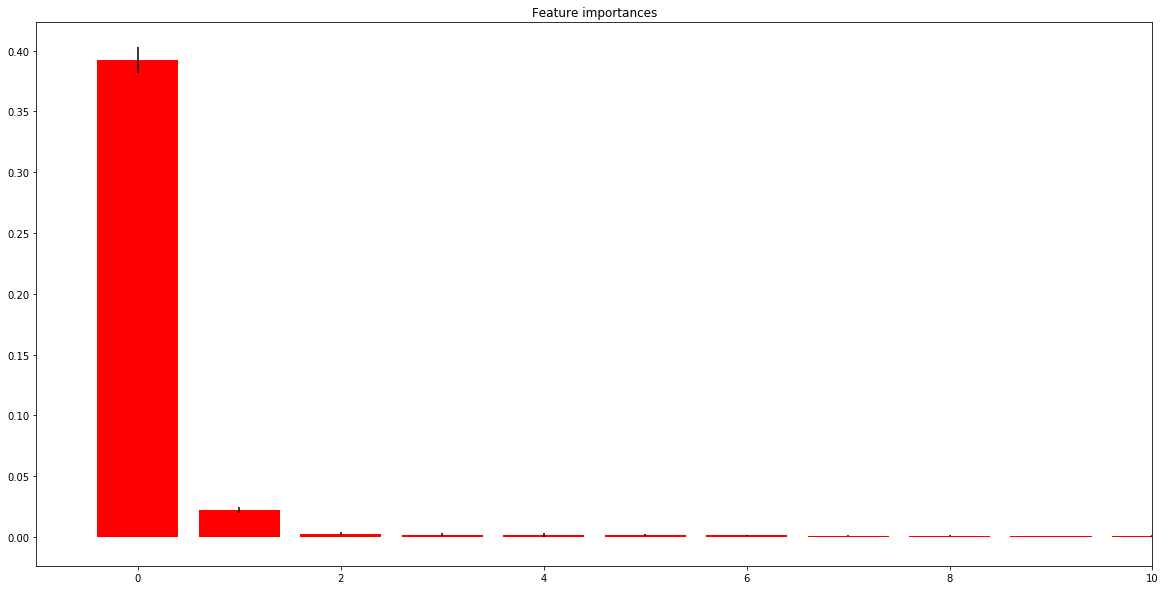

In [119]:
indices = r.importances_mean.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], r.importances_mean[indices[f]]))
    print(columns[f])
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), r.importances_mean[indices],
        color="r", yerr=r.importances_std[indices], align="center")
#plt.xticks(range(10), columns)#was not working on edstem but working on my system plz try if it works in yours
plt.xlim([-1, 10])
plt.show()

<div class='exercise-r'>

**1.4**    

**1.4.1**

</div>

In [25]:
df=pd.DataFrame(data = x_train,  
                  index = None,  
                  columns = columns) 

In [26]:
mean_df=df.copy()

In [27]:
for n,v in df.mean().items():
    mean_df[n]=v

In [28]:
mean_df.head()# contains the mean values

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT_10140,ORIGIN_AIRPORT_10208,...,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,0.005719,0.004648,0.005154,0.001225,-0.002304,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
1,0.005719,0.004648,0.005154,0.001225,-0.002304,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
2,0.005719,0.004648,0.005154,0.001225,-0.002304,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
3,0.005719,0.004648,0.005154,0.001225,-0.002304,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
4,0.005719,0.004648,0.005154,0.001225,-0.002304,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125


In [29]:
using_df=mean_df.copy()
using_df['SCHED_DEP_HOUR']=df['SCHED_DEP_HOUR']

In [30]:
using_df.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT_10140,ORIGIN_AIRPORT_10208,...,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,0.005719,0.004648,0.005154,0.001225,0.809111,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
1,0.005719,0.004648,0.005154,0.001225,-1.859257,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
2,0.005719,0.004648,0.005154,0.001225,-0.217185,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
3,0.005719,0.004648,0.005154,0.001225,1.014370,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
4,0.005719,0.004648,0.005154,0.001225,-1.653998,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125


In [31]:
y_pred_SCHED_DEP_HOUR=NN_model.predict(using_df)

In [32]:
df_inverse=scale.inverse_transform(df)

In [33]:
df_inverse=pd.DataFrame(data = df_inverse,  
                  index = None,  
                  columns = columns) 

In [34]:
df_inverse.head()# inverse scale

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT_10140,ORIGIN_AIRPORT_10208,...,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,20.0,293.0,65.0,2.0,18.0,19.0,120.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-13.0,237.0,73.0,12.0,5.0,7.0,52.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,954.0,165.0,3.0,13.0,16.0,366.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,59.0,808.0,151.0,12.0,19.0,21.0,179.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,620.0,119.0,10.0,6.0,8.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


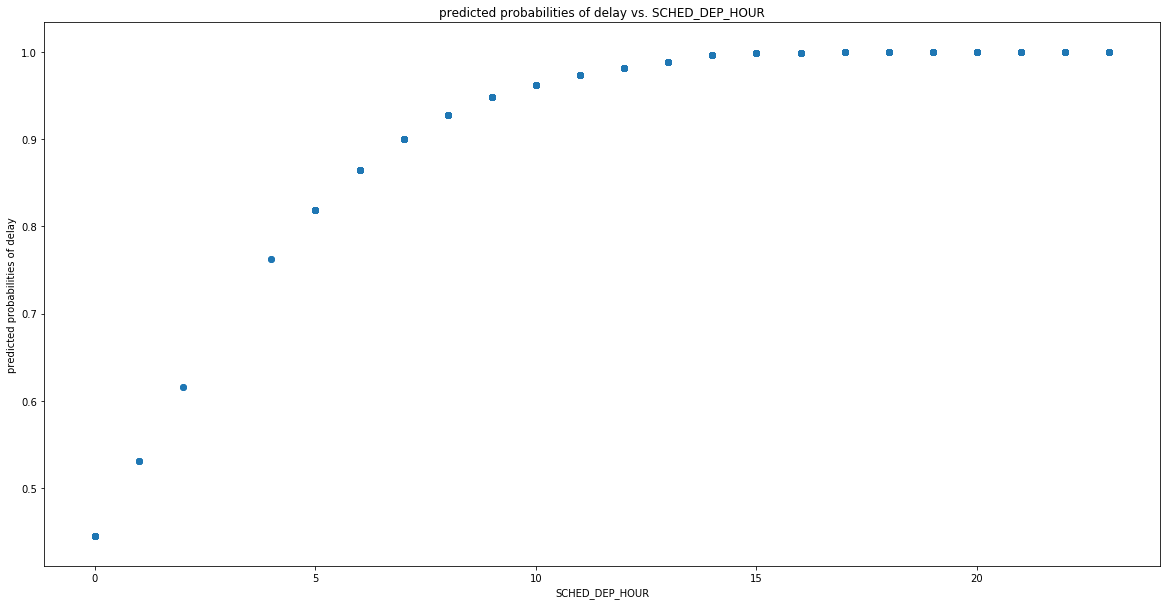

In [35]:
plt.figure(figsize=(20,10))
plt.title("predicted probabilities of delay vs. SCHED_DEP_HOUR")
plt.ylabel('predicted probabilities of delay')
plt.xlabel('SCHED_DEP_HOUR')
plt.scatter(df_inverse['SCHED_DEP_HOUR'].to_numpy(),y_pred_SCHED_DEP_HOUR)

**INTERPRETATION:**

I see with values of SCHED_DEP_HOUR >14 it is certain that the fight will delay.
we see as the SCHED_DEP_HOUR increases the chances for delay increases.

<div class='exercise-r'>

**1.4.2**
</div>

In [36]:
# your code here
using_df=mean_df.copy()
using_df['SCHED_DEP_HOUR']=df['SCHED_DEP_HOUR']
using_df['FLIGHT_COUNT']=df['FLIGHT_COUNT']

In [37]:
using_df.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT_10140,ORIGIN_AIRPORT_10208,...,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,0.005719,0.004648,0.005154,0.001225,0.809111,-0.00252,-0.455786,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
1,0.005719,0.004648,0.005154,0.001225,-1.859257,-0.00252,-0.832941,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
2,0.005719,0.004648,0.005154,0.001225,-0.217185,-0.00252,0.908627,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
3,0.005719,0.004648,0.005154,0.001225,1.014370,-0.00252,-0.128549,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
4,0.005719,0.004648,0.005154,0.001225,-1.653998,-0.00252,-1.115807,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125


In [38]:
y_pred_current=NN_model.predict(using_df)

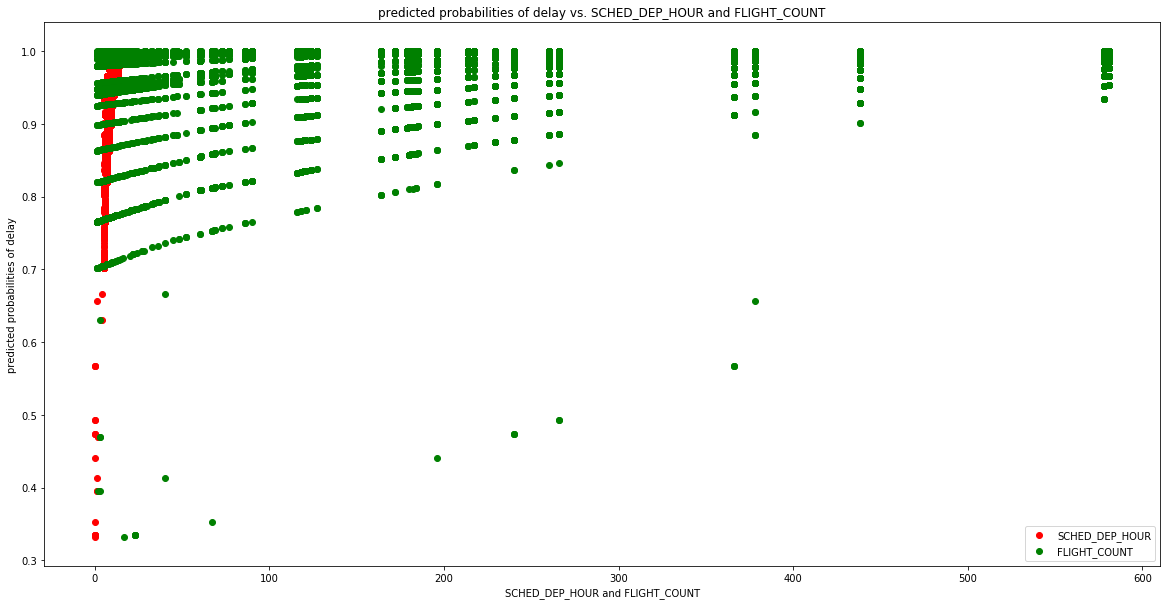

In [39]:
plt.figure(figsize=(20,10))
plt.title("predicted probabilities of delay vs. SCHED_DEP_HOUR and FLIGHT_COUNT")
plt.ylabel('predicted probabilities of delay')
plt.xlabel('SCHED_DEP_HOUR and FLIGHT_COUNT')
plt.scatter(df_inverse['SCHED_DEP_HOUR'], y_pred_current,color='r',label='SCHED_DEP_HOUR')
plt.scatter(df_inverse['FLIGHT_COUNT'], y_pred_current, color='g',label='FLIGHT_COUNT')
plt.legend()
plt.show()

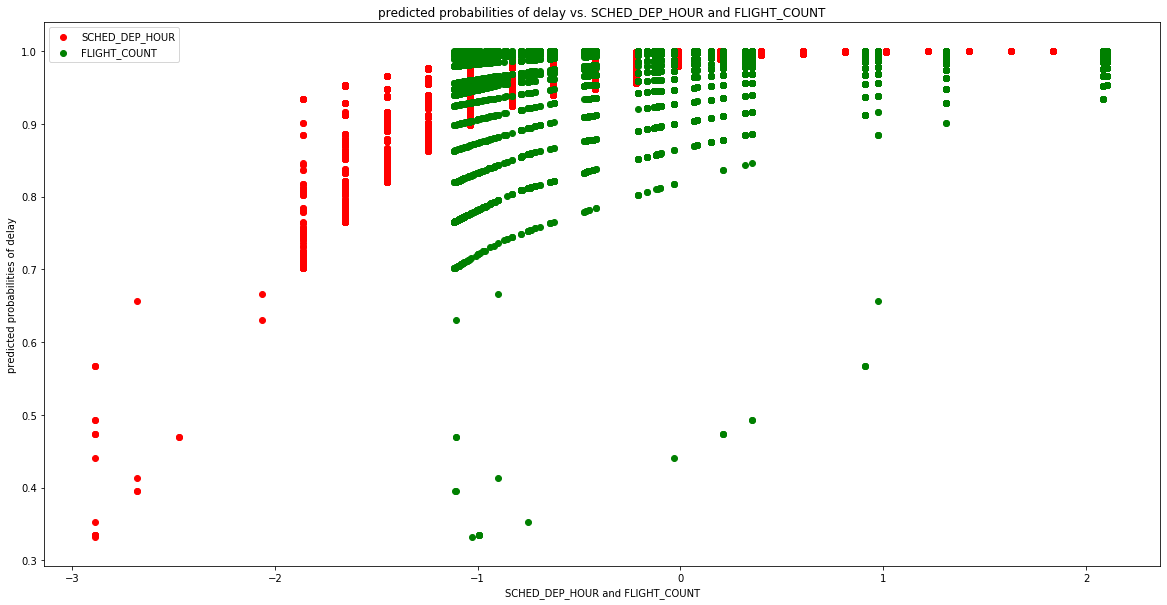

In [40]:
plt.figure(figsize=(20,10))
plt.title("predicted probabilities of delay vs. SCHED_DEP_HOUR and FLIGHT_COUNT")
plt.ylabel('predicted probabilities of delay')
plt.xlabel('SCHED_DEP_HOUR and FLIGHT_COUNT')
plt.scatter(using_df['SCHED_DEP_HOUR'], y_pred_current,color='r',label='SCHED_DEP_HOUR')
plt.scatter(using_df['FLIGHT_COUNT'], y_pred_current, color='g',label='FLIGHT_COUNT')
plt.legend()
plt.show()

<div class='exercise-r'>

**1.4.3**
    
</div>

In [41]:
# your code here
using_df=mean_df.copy()
using_df['SCHED_DEP_HOUR']=df['SCHED_DEP_HOUR']
using_df['SCHED_ARR_HOUR']=df['SCHED_ARR_HOUR']

In [42]:
using_df.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT_10140,ORIGIN_AIRPORT_10208,...,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,0.005719,0.004648,0.005154,0.001225,0.809111,0.665012,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
1,0.005719,0.004648,0.005154,0.001225,-1.859257,-1.600530,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
2,0.005719,0.004648,0.005154,0.001225,-0.217185,0.098627,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
3,0.005719,0.004648,0.005154,0.001225,1.014370,1.042603,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
4,0.005719,0.004648,0.005154,0.001225,-1.653998,-1.411735,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125


In [43]:
y_pred_current=NN_model.predict(using_df)

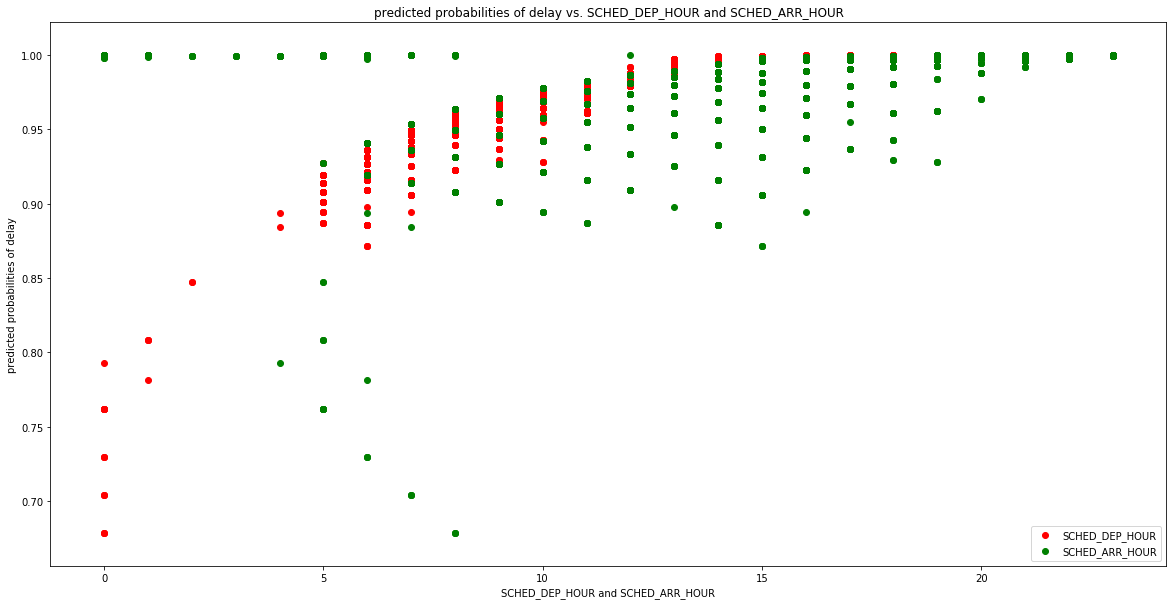

In [44]:
plt.figure(figsize=(20,10))
plt.title("predicted probabilities of delay vs. SCHED_DEP_HOUR and SCHED_ARR_HOUR")
plt.ylabel('predicted probabilities of delay')
plt.xlabel('SCHED_DEP_HOUR and SCHED_ARR_HOUR')
plt.scatter(df_inverse['SCHED_DEP_HOUR'], y_pred_current,color='r',label='SCHED_DEP_HOUR')
plt.scatter(df_inverse['SCHED_ARR_HOUR'], y_pred_current, color='g',label='SCHED_ARR_HOUR')
plt.legend()
plt.show()

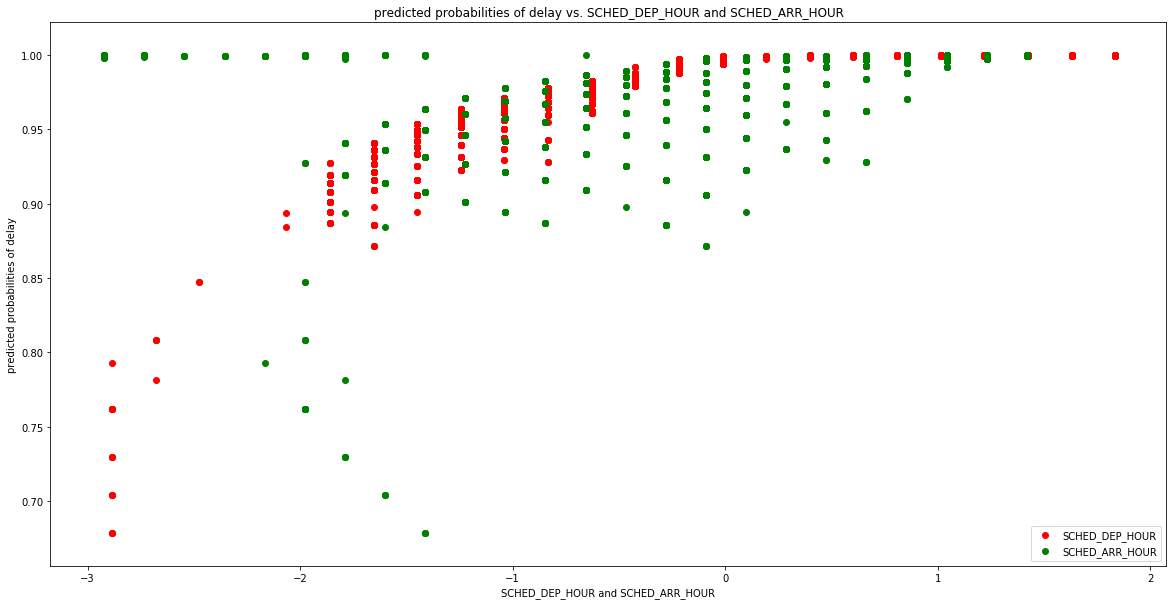

In [45]:
plt.figure(figsize=(20,10))
plt.title("predicted probabilities of delay vs. SCHED_DEP_HOUR and SCHED_ARR_HOUR")
plt.ylabel('predicted probabilities of delay')
plt.xlabel('SCHED_DEP_HOUR and SCHED_ARR_HOUR')
plt.scatter(using_df['SCHED_DEP_HOUR'], y_pred_current,color='r',label='SCHED_DEP_HOUR')
plt.scatter(using_df['SCHED_ARR_HOUR'], y_pred_current, color='g',label='SCHED_ARR_HOUR')
plt.legend()
plt.show()

<div class='exercise-r'>

**1.4.4**
    
</div>

In [46]:
# your code here
using_df=mean_df.copy()
using_df['SCHED_DEP_HOUR']=df['SCHED_DEP_HOUR']
using_df['DISTANCE']=df['DISTANCE']

In [47]:
using_df.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT_10140,ORIGIN_AIRPORT_10208,...,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,0.005719,-0.889620,0.005154,0.001225,0.809111,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
1,0.005719,-0.982376,0.005154,0.001225,-1.859257,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
2,0.005719,0.205233,0.005154,0.001225,-0.217185,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
3,0.005719,-0.036596,0.005154,0.001225,1.014370,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125
4,0.005719,-0.347991,0.005154,0.001225,-1.653998,-0.00252,-0.008657,-0.002835,-0.010001,0.0025,...,0.007509,-0.001964,0.005001,0.005001,-0.001388,0.003536,-0.007502,-0.002184,-0.00125,-0.00125


In [48]:
y_pred_current=NN_model.predict(using_df)

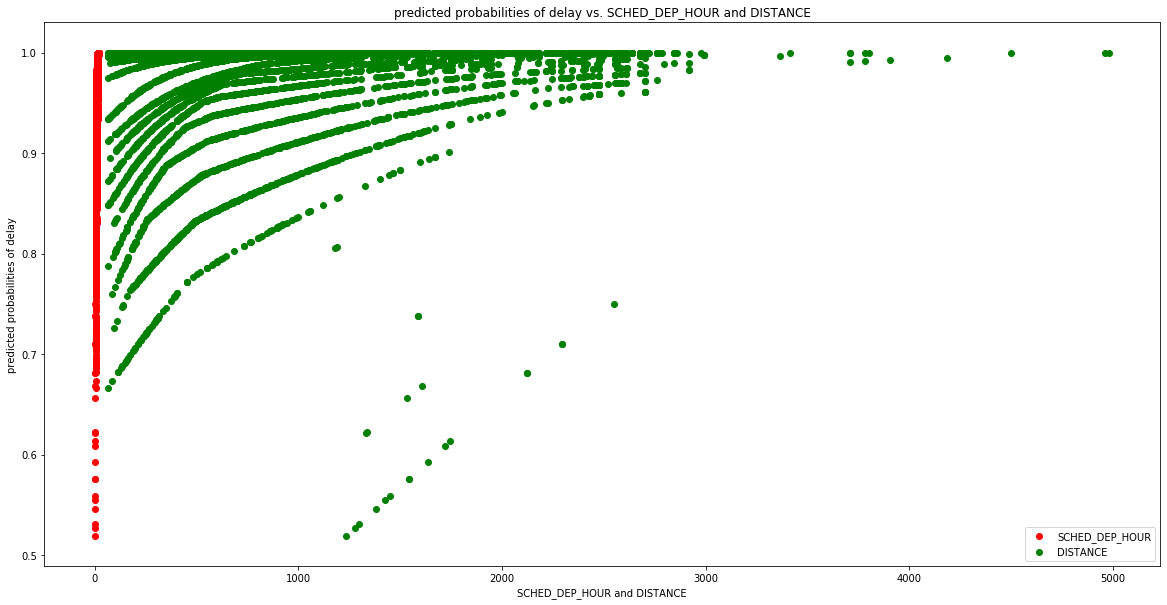

In [49]:
plt.figure(figsize=(20,10))
plt.title("predicted probabilities of delay vs. SCHED_DEP_HOUR and DISTANCE")
plt.ylabel('predicted probabilities of delay')
plt.xlabel('SCHED_DEP_HOUR and DISTANCE')
plt.scatter(df_inverse['SCHED_DEP_HOUR'], y_pred_current,color='r',label='SCHED_DEP_HOUR')
plt.scatter(df_inverse['DISTANCE'], y_pred_current, color='g',label='DISTANCE')
plt.legend()
plt.show()

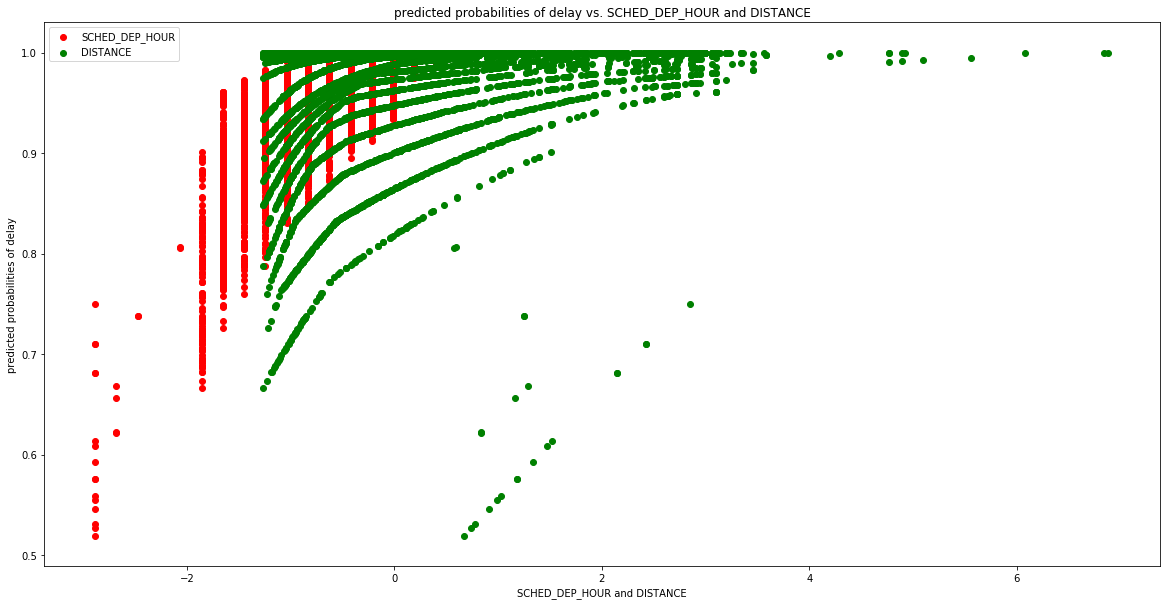

In [50]:
plt.figure(figsize=(20,10))
plt.title("predicted probabilities of delay vs. SCHED_DEP_HOUR and DISTANCE")
plt.ylabel('predicted probabilities of delay')
plt.xlabel('SCHED_DEP_HOUR and DISTANCE')
plt.scatter(using_df['SCHED_DEP_HOUR'], y_pred_current,color='r',label='SCHED_DEP_HOUR')
plt.scatter(using_df['DISTANCE'], y_pred_current, color='g',label='DISTANCE')
plt.legend()
plt.show()

**INTERPRETATION:**

In 1.4.2 we see as SCHED_DEP_HOUR increases probability of delay increases and since FLIGHT_COUNT plot is random we can see that is no relation between FLIGHT_COUNT and the label.
In 1.4.3 we see as SCHED_DEP_HOUR increases probability of delay increases and as SCHED_ARR_HOUR increases probability of delay increases with some noise.
In 1.4.4 we see as SCHED_DEP_HOUR increases probability of delay increases and since DISTANCE plot is random we can see that is no relation between DISTANCE and the label.

<div class='exercise-r'>

**1.5**

</div>

In [51]:
def progressbar(n_step, n_total):
    """Prints self-updating progress bar to stdout to track for-loop progress
    
    There are entire 3rd-party libraries dedicated to custom progress-bars.
    A simple function like this is often more than enough to get the job done.
    
    :param n_total: total number of expected for-loop iterations
    :type n_total: int
    :param n_step: current iteration number, starting at 0
    :type n_step: int

    .. example::
    
        for i in range(n_iterations):
            progressbar(i, n_iterations)
            
    .. source:
    
        This function is a simplified version of code found here:
        https://stackoverflow.com/questions/3160699/python-progress-bar/15860757#15860757
    """
    
    n_step = n_step + 1
    barlen = 50
    progress = n_step / n_total
    block = int(round(barlen * progress))
    status = ""
    if n_step == n_total:
        status = "Done...\r\n\n"
    text = "\r [{0}] {1}/{2} {3}".format(
        "=" * block + "-" * (barlen - block),
        n_step,
        n_total,
        status,
    )
    sys.stdout.write(text)
    sys.stdout.flush()

In [52]:
%%time
# Bootstrap and train your networks and get predictions on fixed X test
# your code here
historys=[]
y_predicted=[]
Replications = np.array([np.random.choice(x_train.shape[0], len(df), replace = True) for _ in range(50)])
for i in range(50):
    progressbar(i, 50)
    train_x=x_train[Replications[i]]
    train_y=y_train[Replications[i]]
    NN_model2 = keras.Sequential()
    NN_model2.add(tf.keras.Input(shape=(811,)))
    NN_model2.add(tf.keras.layers.Dense(15, activation="relu"))
    NN_model2.add(tf.keras.layers.Dense(15, activation="relu"))
    NN_model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    NN_model2.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history=NN_model2.fit(x_train,y_train,epochs=100,validation_split=0.2,verbose=0)
    y_hat=NN_model2.predict(x_test)
    historys.append(history)
    y_predicted.append(y_hat)

 [=-------------------------------------------------] 1/50 

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


 [==================================================] 50/50 Done...

Wall time: 24min 16s


In [53]:
for i in range(50):
    curr=y_predicted[i]
    print("NN_model_test_auc:", roc_auc_score(y_test, y_predicted[i]))

NN_model_test_auc: 0.9789647234430383
NN_model_test_auc: 0.9812917496616008
NN_model_test_auc: 0.9822566751937605
NN_model_test_auc: 0.9812607359845692
NN_model_test_auc: 0.9713633712467198
NN_model_test_auc: 0.9781403598987154
NN_model_test_auc: 0.9777391829796942
NN_model_test_auc: 0.983523233746082
NN_model_test_auc: 0.9769203218619411
NN_model_test_auc: 0.9815628692253284
NN_model_test_auc: 0.978307433578208
NN_model_test_auc: 0.985293514439868
NN_model_test_auc: 0.9685631363431273
NN_model_test_auc: 0.9757092877959179
NN_model_test_auc: 0.9808925736249687
NN_model_test_auc: 0.9786505849079443
NN_model_test_auc: 0.9716590016197142
NN_model_test_auc: 0.9822861882090003
NN_model_test_auc: 0.976796767374412
NN_model_test_auc: 0.9709746998426305
NN_model_test_auc: 0.9785965610834377
NN_model_test_auc: 0.9828099191743559
NN_model_test_auc: 0.9651226190750122
NN_model_test_auc: 0.9828694454254326
NN_model_test_auc: 0.9769303262738867
NN_model_test_auc: 0.9838098601483254
NN_model_test_au

In [59]:
y_test=np.array(y_test)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


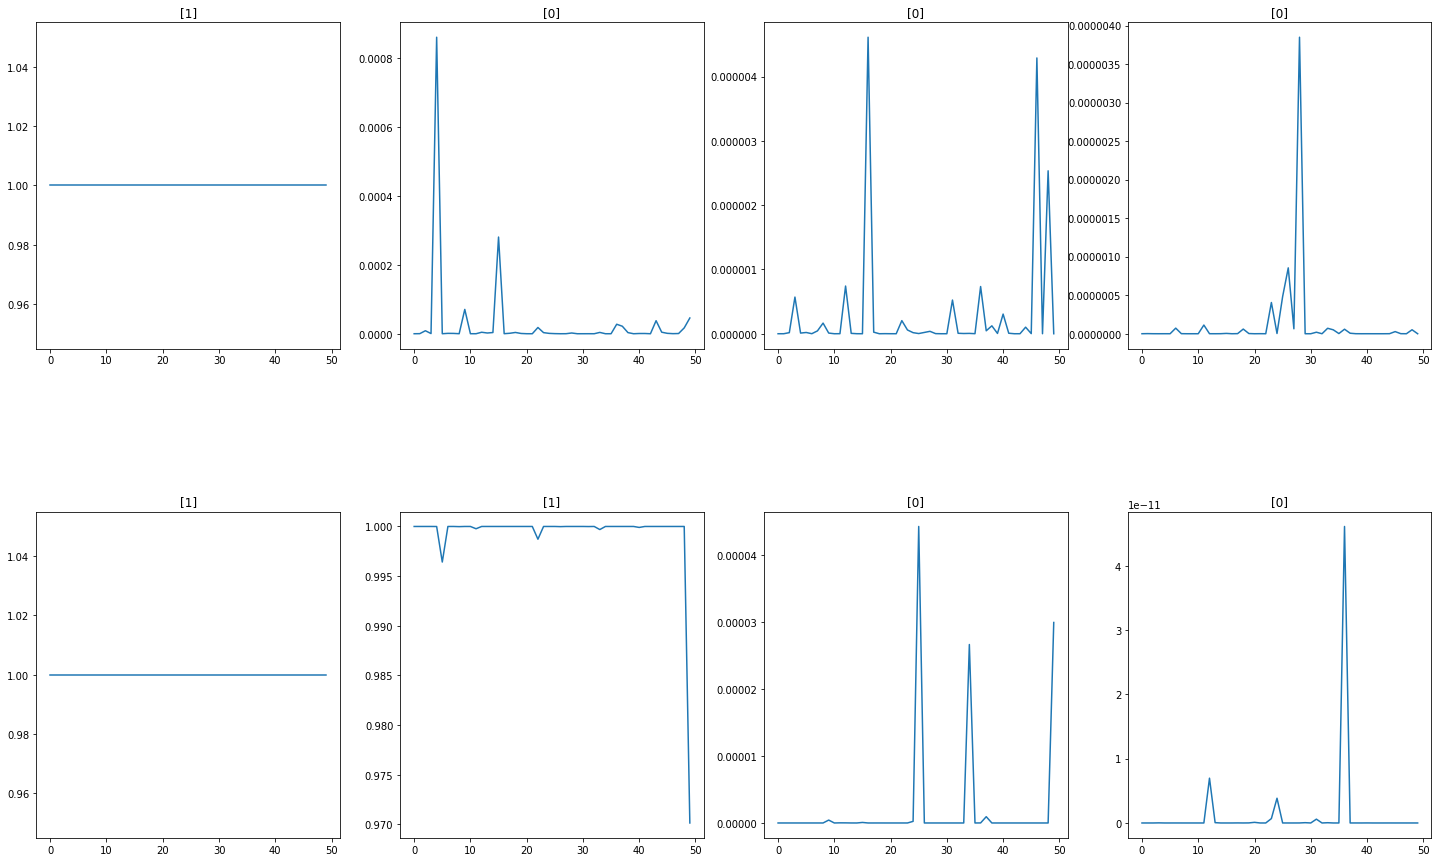

In [60]:
# generate your plot
# your code here
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(25,15))          
ax = axes.ravel()
for i in range(8):
    z=np.random.choice(2000, 1)
    prob=y_predicted
    prob=np.array(prob)
    x=np.squeeze(prob[:,z],axis=1)
    x=np.squeeze(x,axis=1)
    ax[i].plot(x)
    ax[i].title.set_text(y_test[z])
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

**INTERPRETATION:**

We see that in some of the cases all the models gives same results and in some case there is a lot of variation.

<div class='exercise-r'>

**1.6**

</div>

In [61]:
y_predicted=np.array(y_predicted)

In [62]:
y_predicted2=np.squeeze(y_predicted,axis=2)

In [63]:
means_pred=[]
for i in range(2000):
    mean=y_predicted2[:,i].mean()
    means_pred.append(mean)

In [64]:
means_pred=np.array(means_pred)

In [65]:
print("bootstrapped aggregated) model", roc_auc_score(y_test, means_pred))

bootstrapped aggregated) model 0.9906198633597417


In [66]:
# your code here
PPR=[]
for i in range(50):
    curr=y_predicted[i]
    count=len(curr[curr>=0.5])
    PPR.append(count/len(curr))

In [67]:
n=2000*np.array(PPR)

In [68]:
print(PPR)

[0.4535, 0.468, 0.467, 0.4515, 0.4445, 0.457, 0.463, 0.4605, 0.4695, 0.4535, 0.461, 0.4615, 0.4495, 0.4625, 0.4495, 0.4625, 0.4575, 0.489, 0.465, 0.461, 0.4635, 0.4755, 0.4425, 0.4665, 0.464, 0.4695, 0.47, 0.453, 0.4655, 0.456, 0.4555, 0.466, 0.4535, 0.4575, 0.473, 0.466, 0.4485, 0.4745, 0.4625, 0.4545, 0.455, 0.455, 0.4635, 0.4815, 0.463, 0.452, 0.4525, 0.4415, 0.4525, 0.4625]


In [69]:
print(n)

[907. 936. 934. 903. 889. 914. 926. 921. 939. 907. 922. 923. 899. 925.
 899. 925. 915. 978. 930. 922. 927. 951. 885. 933. 928. 939. 940. 906.
 931. 912. 911. 932. 907. 915. 946. 932. 897. 949. 925. 909. 910. 910.
 927. 963. 926. 904. 905. 883. 905. 925.]


In [70]:
def intersection(lst1, lst2): 
    tup1 = map(tuple, lst1) 
    tup2 = map(tuple, lst2)  
    return list(map(list, set(tup1).intersection(tup2))) 

In [71]:
accuracy=[]
samples=[]
for j in [0.3,0.35,0.4,0.45,0.5]:
    mean=0
    index=list(np.where(y_predicted2[0]<j))[0]
    for i in range(1,49):
        index2=list(np.where(y_predicted2[i]<j))[0]
        index=np.intersect1d(index, index2) 
    y=y_test[index]
    samples.append(index.shape)
    mean=np.mean(y_predicted2[:,index],axis=0)
    acc=roc_auc_score(y, mean)
    accuracy.append(acc)

In [72]:
accuracy

[0.8943577430972388,
 0.9000299760191847,
 0.8960322195704058,
 0.8898844786729858,
 0.8917175360710321]

In [73]:
samples

[(848,), (850,), (854,), (860,), (865,)]

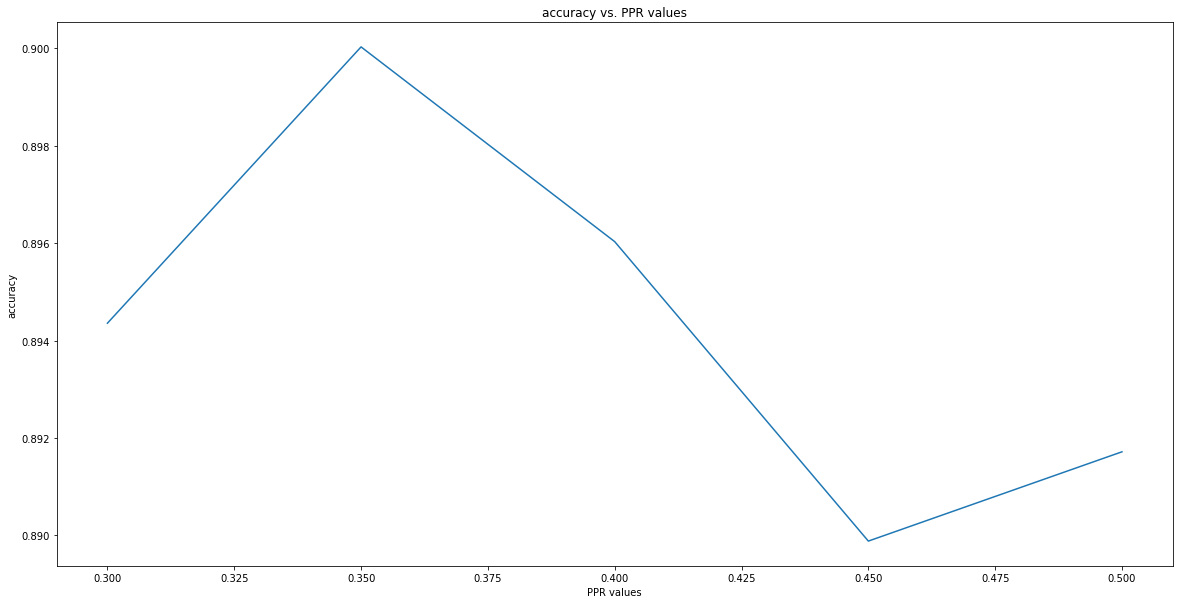

In [74]:
plt.figure(figsize=(20,10))
plt.title("accuracy vs. PPR values")
plt.ylabel('accuracy')
plt.xlabel('PPR values')
plt.plot([0.3,0.35,0.4,0.45,0.5],accuracy)

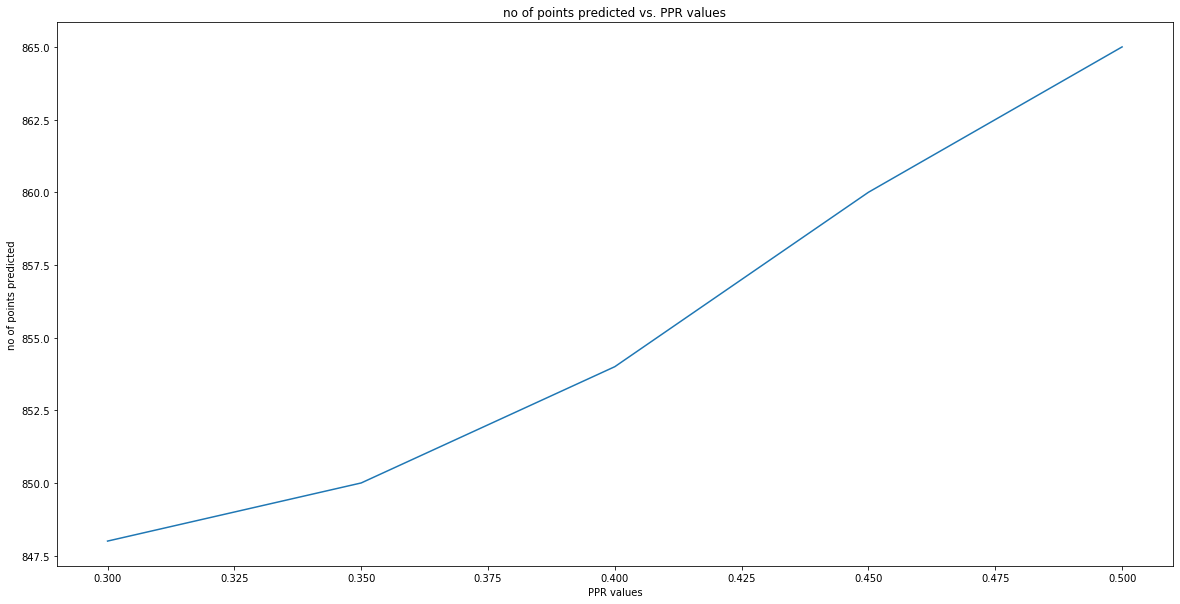

In [75]:
plt.figure(figsize=(20,10))
plt.title("no of points predicted vs. PPR values")
plt.ylabel('no of points predicted')
plt.xlabel('PPR values')
plt.plot([0.3,0.35,0.4,0.45,0.5],samples)

**INTERPRETATION:**

We see as the PPR value increases the accuracy decreases because on increasing PPR value we are increasing the noisy points whose probability is uncertain meaning we are not too sure to which class that point belongs

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


<h1>PART 2 [50 pts]: Kannada MNIST Kaggle competition</h1>
<br /><br />
[Return to contents](#contents)
<br /><br />

<a id="part2intro"></a>
<h2> Problem Statement </h2>
<br /><br />
[Return to contents](#contents)
<br /><br />

ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.
<br /><br />
There are several methods used to improve ANN generalization. 
<br /><br />
One approach is to use an architecture just barely wide or deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.
<br /><br />
However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella term of "regularization".
<br /><br />
In this problem, you are asked to regularize a network of a given architecture.

<a id="part2about"></a>
<br /><br />
<h3> The Kannada MNIST Dataset </h3>
<br /><br />
[Return to contents](#contents)
<br /><br />

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F1e01bcc28b5ccb7ad38a4ffefb13cde0%2Fwondu.png?generation=1603204077179447&alt=media)

<br /><br />
For this problem, we will be working with a modified version of [Kannada MNIST dataset](https://arxiv.org/pdf/1908.01242.pdf) , which is a large database of handwritten digits in the indigenous language *Kannada*.
<br /><br />
This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. 
<br /><br />
For this homework, we will simplify the problem by only use the digits labeled `0` and `1` owing to the similarity of the two symbols, and we want to use a total of 1200 samples for training (this includes the data you will use for validation).
<br /><br />
To understand the dataset better, we recommend this [article](https://towardsdatascience.com/a-new-handwritten-digits-dataset-in-ml-town-kannada-mnist-69df0f2d1456) by Vinay Prabhu, the curator of the dataset.
<br /><br />
<a id="part2data"></a>

<h4> Downloading the Data Files </h4>
<br />
[Return to contents](#contents)
<br />
Please download all files from kaggle [using this link](https://www.kaggle.com/t/35a69f4cdf2747b49ee216bd9f16a0db).
<br /><br />
Here's a brief description of the available files:
<br /><br />
- `kmnist_train.csv` is our training dataset and the last column contains our response class. The 784 other columns correspond to the pixel values of the 28x28 dimension image.
<br /><br />
Class 0 means a sample is the handwritten digit `0` and class 1 means a sample is the handwritten digit `1` in the Kannada language.  
<br />
- `kmnist_test.csv` has a structure similar to `kmnist_train.csv`, however the class label column is NOT included in with the test set. `kmnist_test.csv` has 2000 samples. 
<br /><br />
Kaggle leaderboard scores are accuracy scores calculated by Kaggle when you upload your predictions on this test set.
<br /><br />
- `sample_submission.csv` is the format that kaggle will accept.
<br /><br />
<a id="part2kaggle"></a>

<h3> AI2-C1 Homework1 Kaggle Competition </h3>
<br /><br />
[Return to contents](#contents)
<br /><br />
You need to create an account on Kaggle and join the competition via this [link](https://www.kaggle.com/t/35a69f4cdf2747b49ee216bd9f16a0db). **This is a limited participation competition. Please DO NOT share this link.**
<br /><br />
For more information on the rules governing this Kaggle competition, **please [see question 2.3 below](#part2_3).**

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h2>PART2 Questions</h2>
<br /><br />
[Return to contents](#contents)

<br /><br />
**2.1 [5 points]** **Get the data:**

- Download data from the competition page.
- We will utilize `kmnist_test.csv` in question 2.3.4 only. 
- Load the data and use the matplotlib function `imshow` to display a handwritten 0 and a handwritten 1.
<br /><br />
**2.2 [15 points]** **Overfit an ANN:** 

Build a fully-connected network (FCN) with the architecture given below using `tensorflow.keras` and assign it to a variable called `model_overfit`:

- Number of hidden layers: 3
- Nodes per hidden layer: 100, 100, 100
- Activation function: ReLU 
- Loss function: binary_crossentropy
- Output unit: Sigmoid 
- Optimizer: adam (use the defaults; no other tuning)
- Epochs: no more than 2,000
- Batch size: 128
- Validation size: 0.3

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F6a491ff8d4ff590dc8ded9a25461cd4b%2FScreenshot%202020-10-20%20at%209.42.36%20PM.png?generation=1603210420701577&alt=media) 
    
This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the number of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 

<a id="part2_3"></a>
<br /><br />

**2.3 [30 points]** **Regularize overfit network:**

Create an ANN that doesn't overfit and compete on Kaggle.
<br /><br />
**DON'TS**

**Don't change the architecture**. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. **No CNNs/RNNs/enhancements.**

<br />
    
**NOTE**: We strongly discourage you to use a different training set than the one provided to you (Data augmentation is allowed). If the test set accuracy of your model in this notebook is significantly different than your kaggle submission score, you will receive zero credit for this segment of the homework.

<br /><br />
    
**DOS**

You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation. 
<br /><br />

- **2.3.1** Display your model summary and your training and validation accuracy and loss.

<br />
- **2.3.2** Print the difference between the training and validation accuracies and the difference between the training and validation losses for the final trained epoch used by your model.

<br />
- **2.3.3** Plot the training accuracy and validation accuracy as a function of epochs.
<br />

- **2.3.4** Generate your test set class predictions using your regularized model. Save those predictions to a `.csv` formatted file. Submit that `.csv` file to this Kaggle Competition for leaderboard scoring.
<br />

- **2.3.5** **Specify your Kaggle name that you have used on the leaderboard**. *We can't give you credit without this.*

<br /><br />
    
**IMPORTANT NOTES ABOUT SCORING**:

- The **public leaderboard** on kaggle only displays your performance on 50% of the test set.


- After the competition is complete, the **private leaderboard** will show your performance on the FULL test set.
    
Only the **top 5** competitors (as ranked on the hidden private leaderboard) will be eligible for full credit on question 2.3 (out of **30 points**). Remaining competitors will be scored out of **25 points** only for 2.3.

<br /><br />
    
**ADDITIONAL RULES:**

- Multiple Kaggle submissions are permitted, **just note** that you will need to choose, on Kaggle, which submission shall be used for final scoring.

<br /><br />
- The version of your final notebook submitted on edStem **must contain the same model** used to generate to your chosen Kaggle submission.
<br /><br />

- **Please do not manually label your submissions.** In other words, the labels should only be the outcome of your model.

<br /><br />
- **No external data are allowed, please only use the KMNIST training data downloaded via the link above for training your model.**
<br /><br />

- **Do not** create multiple accounts on Kaggle.

</div>

<a id="part2solutions"></a>

## PART 2 Solutions

[Return to contents](#contents)


<div class='exercise-r'>

**2.1** 
    
</div>

In [76]:
# your code here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score

In [77]:
data_train=pd.read_csv('kmnist_train.csv')
data_test=pd.read_csv('kmnist_test.csv')

In [78]:
data_train.head()

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784,output
0,56.514675,24.749116,15.420758,68.951633,13.760997,13.309949,68.951633,68.951633,13.309949,68.951633,...,31.413656,13.309949,23.733776,13.309949,13.309949,13.309949,68.951633,32.487911,13.309949,1
1,13.122449,13.122449,13.122449,13.122449,13.122449,13.122449,43.090392,15.339362,13.122449,13.122449,...,13.122449,13.122449,13.122449,24.566333,13.122449,13.122449,13.122449,13.409452,13.122449,1
2,56.228990,38.733386,43.356041,30.350765,30.350765,101.791573,30.350765,30.350765,101.791573,56.951487,...,30.350765,30.350765,30.350765,30.350765,30.350765,30.350765,50.652863,101.791573,30.350765,0
3,67.072705,33.257721,51.330661,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,...,73.689417,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,0
4,17.867347,17.867347,17.867347,28.235052,17.867347,17.867347,17.867347,53.074296,43.465014,17.867347,...,17.867347,28.893451,17.867347,17.867347,17.867347,17.867347,62.989647,17.867347,17.867347,0


In [79]:
train_x=data_train.drop('output',axis=1)
train_y=data_train.output

In [80]:
X_train = train_x/255.
X_test = data_test/255.
X_train=np.array(X_train)
X_test=np.array(X_test)
train_y=np.array(train_y)

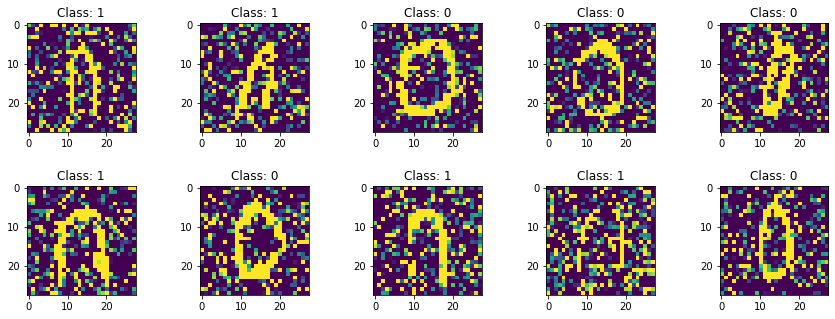

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(train_y[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

<div class='exercise-r'>

**2.2**
    
</div>

In [82]:
# your code here

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation

In [83]:
model_overfit = Sequential()#add 1st hidden layer
model_overfit.add(Dense(input_dim = X_train.shape[1], units = 100,activation='relu'))
model_overfit.add(Dense(units = 100))
model_overfit.add(Activation('relu'))
model_overfit.add(Dense(units = 100))
model_overfit.add(Activation('relu'))
model_overfit.add(Dense(units = 1, activation='sigmoid'))#compile the neural network
model_overfit.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])#model summary
model_overfit.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_154 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_155 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________

In [84]:
history =model_overfit.fit(X_train, train_y,batch_size=128,validation_split=0.3, epochs=1500)

Epoch 1/1500
7/7 [==============================] - 0s 41ms/step - loss: 0.6671 - accuracy: 0.5690 - val_loss: 0.6407 - val_accuracy: 0.8667
Epoch 2/1500
7/7 [==============================] - 0s 9ms/step - loss: 0.6103 - accuracy: 0.6750 - val_loss: 0.5757 - val_accuracy: 0.8139
Epoch 3/1500
7/7 [==============================] - 0s 7ms/step - loss: 0.5272 - accuracy: 0.7881 - val_loss: 0.4632 - val_accuracy: 0.8778
Epoch 4/1500
7/7 [==============================] - 0s 7ms/step - loss: 0.4230 - accuracy: 0.8857 - val_loss: 0.3426 - val_accuracy: 0.9361
Epoch 5/1500
7/7 [==============================] - 0s 7ms/step - loss: 0.3110 - accuracy: 0.9274 - val_loss: 0.2563 - val_accuracy: 0.9361
Epoch 6/1500
7/7 [==============================] - 0s 8ms/step - loss: 0.2351 - accuracy: 0.9393 - val_loss: 0.2060 - val_accuracy: 0.9333
Epoch 7/1500
7/7 [==============================] - 0s 7ms/step - loss: 0.1839 - accuracy: 0.9393 - val_loss: 0.1700 - val_accuracy: 0.9500
Epoch 8/1500
7/7 [=

Epoch 59/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.1694e-04 - accuracy: 1.0000 - val_loss: 0.2282 - val_accuracy: 0.9472
Epoch 60/1500
7/7 [==============================] - 0s 6ms/step - loss: 3.9589e-04 - accuracy: 1.0000 - val_loss: 0.2297 - val_accuracy: 0.9472
Epoch 61/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.7997e-04 - accuracy: 1.0000 - val_loss: 0.2314 - val_accuracy: 0.9472
Epoch 62/1500
7/7 [==============================] - 0s 8ms/step - loss: 3.6562e-04 - accuracy: 1.0000 - val_loss: 0.2318 - val_accuracy: 0.9472
Epoch 63/1500
7/7 [==============================] - 0s 9ms/step - loss: 3.5319e-04 - accuracy: 1.0000 - val_loss: 0.2328 - val_accuracy: 0.9472
Epoch 64/1500
7/7 [==============================] - 0s 9ms/step - loss: 3.4097e-04 - accuracy: 1.0000 - val_loss: 0.2346 - val_accuracy: 0.9444
Epoch 65/1500
7/7 [==============================] - 0s 8ms/step - loss: 3.2892e-04 - accuracy: 1.0000 - val_loss: 0.2328 - val_ac

7/7 [==============================] - 0s 6ms/step - loss: 7.8306e-05 - accuracy: 1.0000 - val_loss: 0.2695 - val_accuracy: 0.9500
Epoch 116/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.6713e-05 - accuracy: 1.0000 - val_loss: 0.2704 - val_accuracy: 0.9500
Epoch 117/1500
7/7 [==============================] - 0s 6ms/step - loss: 7.4823e-05 - accuracy: 1.0000 - val_loss: 0.2703 - val_accuracy: 0.9500
Epoch 118/1500
7/7 [==============================] - 0s 6ms/step - loss: 7.3521e-05 - accuracy: 1.0000 - val_loss: 0.2712 - val_accuracy: 0.9500
Epoch 119/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.1908e-05 - accuracy: 1.0000 - val_loss: 0.2720 - val_accuracy: 0.9500
Epoch 120/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.0414e-05 - accuracy: 1.0000 - val_loss: 0.2728 - val_accuracy: 0.9500
Epoch 121/1500
7/7 [==============================] - 0s 6ms/step - loss: 6.9099e-05 - accuracy: 1.0000 - val_loss: 0.2728 - val_accuracy: 

7/7 [==============================] - 0s 8ms/step - loss: 2.9211e-05 - accuracy: 1.0000 - val_loss: 0.2955 - val_accuracy: 0.9500
Epoch 172/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.8757e-05 - accuracy: 1.0000 - val_loss: 0.2956 - val_accuracy: 0.9500
Epoch 173/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.8366e-05 - accuracy: 1.0000 - val_loss: 0.2958 - val_accuracy: 0.9500
Epoch 174/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.7941e-05 - accuracy: 1.0000 - val_loss: 0.2967 - val_accuracy: 0.9500
Epoch 175/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.7587e-05 - accuracy: 1.0000 - val_loss: 0.2972 - val_accuracy: 0.9500
Epoch 176/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.7096e-05 - accuracy: 1.0000 - val_loss: 0.2976 - val_accuracy: 0.9500
Epoch 177/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.6760e-05 - accuracy: 1.0000 - val_loss: 0.2978 - val_accuracy: 

7/7 [==============================] - 0s 7ms/step - loss: 1.4029e-05 - accuracy: 1.0000 - val_loss: 0.3147 - val_accuracy: 0.9500
Epoch 228/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.3870e-05 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.9500
Epoch 229/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.3703e-05 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.9500
Epoch 230/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.3546e-05 - accuracy: 1.0000 - val_loss: 0.3157 - val_accuracy: 0.9500
Epoch 231/1500
7/7 [==============================] - 0s 8ms/step - loss: 1.3392e-05 - accuracy: 1.0000 - val_loss: 0.3158 - val_accuracy: 0.9500
Epoch 232/1500
7/7 [==============================] - 0s 8ms/step - loss: 1.3250e-05 - accuracy: 1.0000 - val_loss: 0.3163 - val_accuracy: 0.9500
Epoch 233/1500
7/7 [==============================] - 0s 8ms/step - loss: 1.3081e-05 - accuracy: 1.0000 - val_loss: 0.3166 - val_accuracy: 

7/7 [==============================] - 0s 7ms/step - loss: 7.7036e-06 - accuracy: 1.0000 - val_loss: 0.3309 - val_accuracy: 0.9500
Epoch 284/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.6278e-06 - accuracy: 1.0000 - val_loss: 0.3312 - val_accuracy: 0.9500
Epoch 285/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.5678e-06 - accuracy: 1.0000 - val_loss: 0.3309 - val_accuracy: 0.9500
Epoch 286/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.4967e-06 - accuracy: 1.0000 - val_loss: 0.3313 - val_accuracy: 0.9500
Epoch 287/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.4164e-06 - accuracy: 1.0000 - val_loss: 0.3319 - val_accuracy: 0.9500
Epoch 288/1500
7/7 [==============================] - 0s 6ms/step - loss: 7.3438e-06 - accuracy: 1.0000 - val_loss: 0.3321 - val_accuracy: 0.9500
Epoch 289/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.2663e-06 - accuracy: 1.0000 - val_loss: 0.3325 - val_accuracy: 

Epoch 339/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.6071e-06 - accuracy: 1.0000 - val_loss: 0.3444 - val_accuracy: 0.9500
Epoch 340/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.5630e-06 - accuracy: 1.0000 - val_loss: 0.3448 - val_accuracy: 0.9500
Epoch 341/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.5285e-06 - accuracy: 1.0000 - val_loss: 0.3453 - val_accuracy: 0.9500
Epoch 342/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.4908e-06 - accuracy: 1.0000 - val_loss: 0.3455 - val_accuracy: 0.9500
Epoch 343/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.4541e-06 - accuracy: 1.0000 - val_loss: 0.3459 - val_accuracy: 0.9500
Epoch 344/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.4124e-06 - accuracy: 1.0000 - val_loss: 0.3463 - val_accuracy: 0.9500
Epoch 345/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.3747e-06 - accuracy: 1.0000 - val_loss: 0.3464 -

7/7 [==============================] - 0s 7ms/step - loss: 2.9287e-06 - accuracy: 1.0000 - val_loss: 0.3570 - val_accuracy: 0.9528
Epoch 396/1500
7/7 [==============================] - 0s 6ms/step - loss: 2.9081e-06 - accuracy: 1.0000 - val_loss: 0.3574 - val_accuracy: 0.9528
Epoch 397/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.8854e-06 - accuracy: 1.0000 - val_loss: 0.3575 - val_accuracy: 0.9528
Epoch 398/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.8639e-06 - accuracy: 1.0000 - val_loss: 0.3577 - val_accuracy: 0.9528
Epoch 399/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.8422e-06 - accuracy: 1.0000 - val_loss: 0.3577 - val_accuracy: 0.9528
Epoch 400/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.8225e-06 - accuracy: 1.0000 - val_loss: 0.3578 - val_accuracy: 0.9528
Epoch 401/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.7992e-06 - accuracy: 1.0000 - val_loss: 0.3580 - val_accuracy: 

7/7 [==============================] - 0s 7ms/step - loss: 1.9504e-06 - accuracy: 1.0000 - val_loss: 0.3682 - val_accuracy: 0.9500
Epoch 452/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.9352e-06 - accuracy: 1.0000 - val_loss: 0.3681 - val_accuracy: 0.9500
Epoch 453/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.9216e-06 - accuracy: 1.0000 - val_loss: 0.3681 - val_accuracy: 0.9500
Epoch 454/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.9085e-06 - accuracy: 1.0000 - val_loss: 0.3683 - val_accuracy: 0.9500
Epoch 455/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.8961e-06 - accuracy: 1.0000 - val_loss: 0.3684 - val_accuracy: 0.9500
Epoch 456/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.8841e-06 - accuracy: 1.0000 - val_loss: 0.3683 - val_accuracy: 0.9528
Epoch 457/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.8708e-06 - accuracy: 1.0000 - val_loss: 0.3689 - val_accuracy: 

7/7 [==============================] - 0s 7ms/step - loss: 1.3441e-06 - accuracy: 1.0000 - val_loss: 0.3779 - val_accuracy: 0.9500
Epoch 508/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.3355e-06 - accuracy: 1.0000 - val_loss: 0.3783 - val_accuracy: 0.9500
Epoch 509/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.3264e-06 - accuracy: 1.0000 - val_loss: 0.3784 - val_accuracy: 0.9500
Epoch 510/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.3173e-06 - accuracy: 1.0000 - val_loss: 0.3787 - val_accuracy: 0.9500
Epoch 511/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.3097e-06 - accuracy: 1.0000 - val_loss: 0.3787 - val_accuracy: 0.9500
Epoch 512/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.3019e-06 - accuracy: 1.0000 - val_loss: 0.3791 - val_accuracy: 0.9500
Epoch 513/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.2933e-06 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 

7/7 [==============================] - 0s 8ms/step - loss: 9.5122e-07 - accuracy: 1.0000 - val_loss: 0.3873 - val_accuracy: 0.9500
Epoch 564/1500
7/7 [==============================] - 0s 7ms/step - loss: 9.4550e-07 - accuracy: 1.0000 - val_loss: 0.3873 - val_accuracy: 0.9500
Epoch 565/1500
7/7 [==============================] - 0s 7ms/step - loss: 9.4030e-07 - accuracy: 1.0000 - val_loss: 0.3873 - val_accuracy: 0.9500
Epoch 566/1500
7/7 [==============================] - 0s 6ms/step - loss: 9.3573e-07 - accuracy: 1.0000 - val_loss: 0.3877 - val_accuracy: 0.9500
Epoch 567/1500
7/7 [==============================] - 0s 6ms/step - loss: 9.2898e-07 - accuracy: 1.0000 - val_loss: 0.3879 - val_accuracy: 0.9500
Epoch 568/1500
7/7 [==============================] - 0s 6ms/step - loss: 9.2315e-07 - accuracy: 1.0000 - val_loss: 0.3879 - val_accuracy: 0.9500
Epoch 569/1500
7/7 [==============================] - 0s 8ms/step - loss: 9.1816e-07 - accuracy: 1.0000 - val_loss: 0.3880 - val_accuracy: 

7/7 [==============================] - 0s 8ms/step - loss: 6.8943e-07 - accuracy: 1.0000 - val_loss: 0.3959 - val_accuracy: 0.9500
Epoch 620/1500
7/7 [==============================] - 0s 8ms/step - loss: 6.8548e-07 - accuracy: 1.0000 - val_loss: 0.3960 - val_accuracy: 0.9500
Epoch 621/1500
7/7 [==============================] - 0s 9ms/step - loss: 6.8208e-07 - accuracy: 1.0000 - val_loss: 0.3964 - val_accuracy: 0.9500
Epoch 622/1500
7/7 [==============================] - 0s 8ms/step - loss: 6.7790e-07 - accuracy: 1.0000 - val_loss: 0.3964 - val_accuracy: 0.9500
Epoch 623/1500
7/7 [==============================] - 0s 7ms/step - loss: 6.7473e-07 - accuracy: 1.0000 - val_loss: 0.3968 - val_accuracy: 0.9500
Epoch 624/1500
7/7 [==============================] - 0s 6ms/step - loss: 6.7042e-07 - accuracy: 1.0000 - val_loss: 0.3968 - val_accuracy: 0.9500
Epoch 625/1500
7/7 [==============================] - 0s 7ms/step - loss: 6.6658e-07 - accuracy: 1.0000 - val_loss: 0.3969 - val_accuracy: 

7/7 [==============================] - 0s 7ms/step - loss: 5.0836e-07 - accuracy: 1.0000 - val_loss: 0.4039 - val_accuracy: 0.9500
Epoch 676/1500
7/7 [==============================] - 0s 7ms/step - loss: 5.0525e-07 - accuracy: 1.0000 - val_loss: 0.4041 - val_accuracy: 0.9500
Epoch 677/1500
7/7 [==============================] - 0s 10ms/step - loss: 5.0315e-07 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 0.9500
Epoch 678/1500
7/7 [==============================] - 0s 8ms/step - loss: 4.9999e-07 - accuracy: 1.0000 - val_loss: 0.4044 - val_accuracy: 0.9500
Epoch 679/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.9743e-07 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 0.9500
Epoch 680/1500
7/7 [==============================] - 0s 8ms/step - loss: 4.9486e-07 - accuracy: 1.0000 - val_loss: 0.4047 - val_accuracy: 0.9500
Epoch 681/1500
7/7 [==============================] - 0s 8ms/step - loss: 4.9213e-07 - accuracy: 1.0000 - val_loss: 0.4049 - val_accuracy:

7/7 [==============================] - 0s 8ms/step - loss: 3.7976e-07 - accuracy: 1.0000 - val_loss: 0.4123 - val_accuracy: 0.9500
Epoch 732/1500
7/7 [==============================] - 0s 8ms/step - loss: 3.7782e-07 - accuracy: 1.0000 - val_loss: 0.4124 - val_accuracy: 0.9500
Epoch 733/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.7620e-07 - accuracy: 1.0000 - val_loss: 0.4122 - val_accuracy: 0.9500
Epoch 734/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.7396e-07 - accuracy: 1.0000 - val_loss: 0.4125 - val_accuracy: 0.9500
Epoch 735/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.7194e-07 - accuracy: 1.0000 - val_loss: 0.4127 - val_accuracy: 0.9500
Epoch 736/1500
7/7 [==============================] - 0s 8ms/step - loss: 3.7038e-07 - accuracy: 1.0000 - val_loss: 0.4130 - val_accuracy: 0.9500
Epoch 737/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.6837e-07 - accuracy: 1.0000 - val_loss: 0.4130 - val_accuracy: 

7/7 [==============================] - 0s 7ms/step - loss: 2.8792e-07 - accuracy: 1.0000 - val_loss: 0.4192 - val_accuracy: 0.9500
Epoch 788/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.8661e-07 - accuracy: 1.0000 - val_loss: 0.4196 - val_accuracy: 0.9500
Epoch 789/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.8510e-07 - accuracy: 1.0000 - val_loss: 0.4197 - val_accuracy: 0.9500
Epoch 790/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.8391e-07 - accuracy: 1.0000 - val_loss: 0.4198 - val_accuracy: 0.9500
Epoch 791/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.8250e-07 - accuracy: 1.0000 - val_loss: 0.4200 - val_accuracy: 0.9500
Epoch 792/1500
7/7 [==============================] - 0s 9ms/step - loss: 2.8109e-07 - accuracy: 1.0000 - val_loss: 0.4203 - val_accuracy: 0.9500
Epoch 793/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.7970e-07 - accuracy: 1.0000 - val_loss: 0.4203 - val_accuracy: 

7/7 [==============================] - 0s 6ms/step - loss: 2.2030e-07 - accuracy: 1.0000 - val_loss: 0.4265 - val_accuracy: 0.9500
Epoch 844/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.1918e-07 - accuracy: 1.0000 - val_loss: 0.4267 - val_accuracy: 0.9500
Epoch 845/1500
7/7 [==============================] - 0s 6ms/step - loss: 2.1843e-07 - accuracy: 1.0000 - val_loss: 0.4270 - val_accuracy: 0.9500
Epoch 846/1500
7/7 [==============================] - 0s 6ms/step - loss: 2.1715e-07 - accuracy: 1.0000 - val_loss: 0.4271 - val_accuracy: 0.9500
Epoch 847/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.1629e-07 - accuracy: 1.0000 - val_loss: 0.4270 - val_accuracy: 0.9500
Epoch 848/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.1514e-07 - accuracy: 1.0000 - val_loss: 0.4271 - val_accuracy: 0.9500
Epoch 849/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.1411e-07 - accuracy: 1.0000 - val_loss: 0.4274 - val_accuracy: 

7/7 [==============================] - 0s 6ms/step - loss: 1.7002e-07 - accuracy: 1.0000 - val_loss: 0.4336 - val_accuracy: 0.9500
Epoch 900/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.6915e-07 - accuracy: 1.0000 - val_loss: 0.4339 - val_accuracy: 0.9500
Epoch 901/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.6846e-07 - accuracy: 1.0000 - val_loss: 0.4341 - val_accuracy: 0.9500
Epoch 902/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.6772e-07 - accuracy: 1.0000 - val_loss: 0.4340 - val_accuracy: 0.9500
Epoch 903/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.6688e-07 - accuracy: 1.0000 - val_loss: 0.4342 - val_accuracy: 0.9500
Epoch 904/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.6611e-07 - accuracy: 1.0000 - val_loss: 0.4343 - val_accuracy: 0.9500
Epoch 905/1500
7/7 [==============================] - 0s 8ms/step - loss: 1.6536e-07 - accuracy: 1.0000 - val_loss: 0.4344 - val_accuracy: 

7/7 [==============================] - 0s 6ms/step - loss: 1.3235e-07 - accuracy: 1.0000 - val_loss: 0.4403 - val_accuracy: 0.9500
Epoch 956/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.3178e-07 - accuracy: 1.0000 - val_loss: 0.4407 - val_accuracy: 0.9500
Epoch 957/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.3105e-07 - accuracy: 1.0000 - val_loss: 0.4407 - val_accuracy: 0.9500
Epoch 958/1500
7/7 [==============================] - 0s 8ms/step - loss: 1.3047e-07 - accuracy: 1.0000 - val_loss: 0.4406 - val_accuracy: 0.9500
Epoch 959/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.2991e-07 - accuracy: 1.0000 - val_loss: 0.4408 - val_accuracy: 0.9500
Epoch 960/1500
7/7 [==============================] - 0s 8ms/step - loss: 1.2933e-07 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.9500
Epoch 961/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.2877e-07 - accuracy: 1.0000 - val_loss: 0.4410 - val_accuracy: 

7/7 [==============================] - 0s 6ms/step - loss: 1.0358e-07 - accuracy: 1.0000 - val_loss: 0.4470 - val_accuracy: 0.9500
Epoch 1012/1500
7/7 [==============================] - 0s 6ms/step - loss: 1.0313e-07 - accuracy: 1.0000 - val_loss: 0.4470 - val_accuracy: 0.9500
Epoch 1013/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.0266e-07 - accuracy: 1.0000 - val_loss: 0.4471 - val_accuracy: 0.9500
Epoch 1014/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.0227e-07 - accuracy: 1.0000 - val_loss: 0.4470 - val_accuracy: 0.9500
Epoch 1015/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.0199e-07 - accuracy: 1.0000 - val_loss: 0.4469 - val_accuracy: 0.9500
Epoch 1016/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.0137e-07 - accuracy: 1.0000 - val_loss: 0.4472 - val_accuracy: 0.9500
Epoch 1017/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.0102e-07 - accuracy: 1.0000 - val_loss: 0.4475 - val_accu

Epoch 1067/1500
7/7 [==============================] - 0s 8ms/step - loss: 8.1692e-08 - accuracy: 1.0000 - val_loss: 0.4531 - val_accuracy: 0.9500
Epoch 1068/1500
7/7 [==============================] - 0s 10ms/step - loss: 8.1404e-08 - accuracy: 1.0000 - val_loss: 0.4531 - val_accuracy: 0.9500
Epoch 1069/1500
7/7 [==============================] - 0s 8ms/step - loss: 8.1036e-08 - accuracy: 1.0000 - val_loss: 0.4533 - val_accuracy: 0.9500
Epoch 1070/1500
7/7 [==============================] - 0s 7ms/step - loss: 8.0688e-08 - accuracy: 1.0000 - val_loss: 0.4535 - val_accuracy: 0.9500
Epoch 1071/1500
7/7 [==============================] - 0s 7ms/step - loss: 8.0361e-08 - accuracy: 1.0000 - val_loss: 0.4537 - val_accuracy: 0.9500
Epoch 1072/1500
7/7 [==============================] - 0s 8ms/step - loss: 8.0030e-08 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.9500
Epoch 1073/1500
7/7 [==============================] - 0s 7ms/step - loss: 7.9754e-08 - accuracy: 1.0000 - val_loss: 

Epoch 1123/1500
7/7 [==============================] - 0s 9ms/step - loss: 6.4888e-08 - accuracy: 1.0000 - val_loss: 0.4590 - val_accuracy: 0.9500
Epoch 1124/1500
7/7 [==============================] - 0s 7ms/step - loss: 6.4635e-08 - accuracy: 1.0000 - val_loss: 0.4592 - val_accuracy: 0.9500
Epoch 1125/1500
7/7 [==============================] - 0s 7ms/step - loss: 6.4352e-08 - accuracy: 1.0000 - val_loss: 0.4592 - val_accuracy: 0.9500
Epoch 1126/1500
7/7 [==============================] - 0s 6ms/step - loss: 6.4122e-08 - accuracy: 1.0000 - val_loss: 0.4592 - val_accuracy: 0.9500
Epoch 1127/1500
7/7 [==============================] - 0s 6ms/step - loss: 6.3838e-08 - accuracy: 1.0000 - val_loss: 0.4594 - val_accuracy: 0.9500
Epoch 1128/1500
7/7 [==============================] - 0s 6ms/step - loss: 6.3573e-08 - accuracy: 1.0000 - val_loss: 0.4596 - val_accuracy: 0.9500
Epoch 1129/1500
7/7 [==============================] - 0s 8ms/step - loss: 6.3303e-08 - accuracy: 1.0000 - val_loss: 0

7/7 [==============================] - 0s 7ms/step - loss: 5.1908e-08 - accuracy: 1.0000 - val_loss: 0.4650 - val_accuracy: 0.9500
Epoch 1179/1500
7/7 [==============================] - 0s 9ms/step - loss: 5.1707e-08 - accuracy: 1.0000 - val_loss: 0.4650 - val_accuracy: 0.9500
Epoch 1180/1500
7/7 [==============================] - 0s 8ms/step - loss: 5.1501e-08 - accuracy: 1.0000 - val_loss: 0.4651 - val_accuracy: 0.9500
Epoch 1181/1500
7/7 [==============================] - 0s 7ms/step - loss: 5.1296e-08 - accuracy: 1.0000 - val_loss: 0.4653 - val_accuracy: 0.9500
Epoch 1182/1500
7/7 [==============================] - 0s 7ms/step - loss: 5.1106e-08 - accuracy: 1.0000 - val_loss: 0.4653 - val_accuracy: 0.9500
Epoch 1183/1500
7/7 [==============================] - 0s 6ms/step - loss: 5.0893e-08 - accuracy: 1.0000 - val_loss: 0.4654 - val_accuracy: 0.9500
Epoch 1184/1500
7/7 [==============================] - 0s 8ms/step - loss: 5.0686e-08 - accuracy: 1.0000 - val_loss: 0.4655 - val_accu

Epoch 1234/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.1586e-08 - accuracy: 1.0000 - val_loss: 0.4705 - val_accuracy: 0.9500
Epoch 1235/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.1464e-08 - accuracy: 1.0000 - val_loss: 0.4703 - val_accuracy: 0.9500
Epoch 1236/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.1272e-08 - accuracy: 1.0000 - val_loss: 0.4706 - val_accuracy: 0.9500
Epoch 1237/1500
7/7 [==============================] - 0s 8ms/step - loss: 4.1124e-08 - accuracy: 1.0000 - val_loss: 0.4709 - val_accuracy: 0.9500
Epoch 1238/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.0943e-08 - accuracy: 1.0000 - val_loss: 0.4708 - val_accuracy: 0.9500
Epoch 1239/1500
7/7 [==============================] - 0s 7ms/step - loss: 4.0796e-08 - accuracy: 1.0000 - val_loss: 0.4710 - val_accuracy: 0.9500
Epoch 1240/1500
7/7 [==============================] - 0s 6ms/step - loss: 4.0636e-08 - accuracy: 1.0000 - val_loss: 0

7/7 [==============================] - 0s 9ms/step - loss: 3.3634e-08 - accuracy: 1.0000 - val_loss: 0.4761 - val_accuracy: 0.9500
Epoch 1290/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.3492e-08 - accuracy: 1.0000 - val_loss: 0.4764 - val_accuracy: 0.9500
Epoch 1291/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.3363e-08 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9500
Epoch 1292/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.3237e-08 - accuracy: 1.0000 - val_loss: 0.4765 - val_accuracy: 0.9500
Epoch 1293/1500
7/7 [==============================] - 0s 8ms/step - loss: 3.3114e-08 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9500
Epoch 1294/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.2981e-08 - accuracy: 1.0000 - val_loss: 0.4767 - val_accuracy: 0.9500
Epoch 1295/1500
7/7 [==============================] - 0s 7ms/step - loss: 3.2864e-08 - accuracy: 1.0000 - val_loss: 0.4768 - val_accu

Epoch 1345/1500
7/7 [==============================] - 0s 6ms/step - loss: 2.7195e-08 - accuracy: 1.0000 - val_loss: 0.4816 - val_accuracy: 0.9500
Epoch 1346/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.7095e-08 - accuracy: 1.0000 - val_loss: 0.4819 - val_accuracy: 0.9500
Epoch 1347/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.7006e-08 - accuracy: 1.0000 - val_loss: 0.4817 - val_accuracy: 0.9500
Epoch 1348/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.6895e-08 - accuracy: 1.0000 - val_loss: 0.4821 - val_accuracy: 0.9500
Epoch 1349/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.6768e-08 - accuracy: 1.0000 - val_loss: 0.4821 - val_accuracy: 0.9500
Epoch 1350/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.6673e-08 - accuracy: 1.0000 - val_loss: 0.4821 - val_accuracy: 0.9500
Epoch 1351/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.6574e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 1401/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.2088e-08 - accuracy: 1.0000 - val_loss: 0.4871 - val_accuracy: 0.9500
Epoch 1402/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.2014e-08 - accuracy: 1.0000 - val_loss: 0.4873 - val_accuracy: 0.9500
Epoch 1403/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.1927e-08 - accuracy: 1.0000 - val_loss: 0.4873 - val_accuracy: 0.9500
Epoch 1404/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.1849e-08 - accuracy: 1.0000 - val_loss: 0.4872 - val_accuracy: 0.9500
Epoch 1405/1500
7/7 [==============================] - 0s 7ms/step - loss: 2.1772e-08 - accuracy: 1.0000 - val_loss: 0.4873 - val_accuracy: 0.9500
Epoch 1406/1500
7/7 [==============================] - 0s 8ms/step - loss: 2.1694e-08 - accuracy: 1.0000 - val_loss: 0.4875 - val_accuracy: 0.9500
Epoch 1407/1500
7/7 [==============================] - 0s 9ms/step - loss: 2.1622e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 1457/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.8041e-08 - accuracy: 1.0000 - val_loss: 0.4917 - val_accuracy: 0.9500
Epoch 1458/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.7996e-08 - accuracy: 1.0000 - val_loss: 0.4916 - val_accuracy: 0.9500
Epoch 1459/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.7950e-08 - accuracy: 1.0000 - val_loss: 0.4918 - val_accuracy: 0.9500
Epoch 1460/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.7876e-08 - accuracy: 1.0000 - val_loss: 0.4918 - val_accuracy: 0.9500
Epoch 1461/1500
7/7 [==============================] - 0s 7ms/step - loss: 1.7809e-08 - accuracy: 1.0000 - val_loss: 0.4919 - val_accuracy: 0.9500
Epoch 1462/1500
7/7 [==============================] - 0s 8ms/step - loss: 1.7741e-08 - accuracy: 1.0000 - val_loss: 0.4921 - val_accuracy: 0.9500
Epoch 1463/1500
7/7 [==============================] - 0s 9ms/step - loss: 1.7676e-08 - accuracy: 1.0000 - val_loss: 0

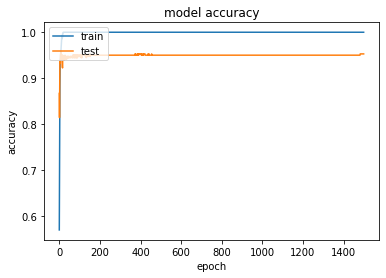

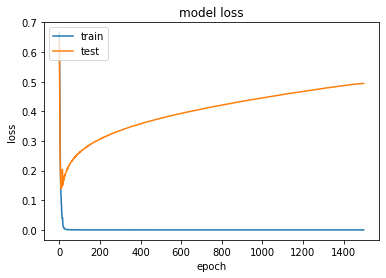

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**INTERPRETATION:**

Since the difference in the training and validation loss is huge we can say the model is overfitting

<div class='exercise-r'>

**2.3** 

**2.3.1**
    
</div>

In [86]:
def scheduler(epoch, lr):
    if epoch < 10: 
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [87]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [88]:
# your code here
model = Sequential()#add 1st hidden layer
model.add(Dense(input_dim = X_train.shape[1], units = 100,activation='relu',kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.1))
model.add(Dense(units = 100,kernel_regularizer='l2'))
model.add(Activation('relu'))
model.add(tf.keras.layers.Dropout(.15))
model.add(Dense(units = 100,kernel_regularizer='l2'))
model.add(Activation('relu',))
model.add(tf.keras.layers.Dropout(.15))
model.add(Dense(units = 1, activation='sigmoid'))#compile the neural network
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])#model summary
model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_159 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)             

In [89]:
history = model.fit(X_train, train_y,batch_size=64,validation_split=0.2, epochs=1500,callbacks=[callback,callback2])

Epoch 1/1500
15/15 [==============================] - 0s 15ms/step - loss: 3.8992 - accuracy: 0.5396 - val_loss: 3.3038 - val_accuracy: 0.5208
Epoch 2/1500
15/15 [==============================] - 0s 7ms/step - loss: 2.8816 - accuracy: 0.6646 - val_loss: 2.4539 - val_accuracy: 0.5750
Epoch 3/1500
15/15 [==============================] - 0s 5ms/step - loss: 2.1197 - accuracy: 0.8292 - val_loss: 1.7572 - val_accuracy: 0.9417
Epoch 4/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.5430 - accuracy: 0.9104 - val_loss: 1.3167 - val_accuracy: 0.9125
Epoch 5/1500
15/15 [==============================] - 0s 5ms/step - loss: 1.1568 - accuracy: 0.9406 - val_loss: 1.0277 - val_accuracy: 0.9458
Epoch 6/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.9330 - accuracy: 0.9615 - val_loss: 0.8915 - val_accuracy: 0.9125
Epoch 7/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.7802 - accuracy: 0.9594 - val_loss: 0.7437 - val_accuracy: 0.9458
Epoch

15/15 [==============================] - 0s 4ms/step - loss: 0.2170 - accuracy: 0.9979 - val_loss: 0.3196 - val_accuracy: 0.9375
Epoch 59/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9969 - val_loss: 0.3192 - val_accuracy: 0.9417
Epoch 60/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.9969 - val_loss: 0.3189 - val_accuracy: 0.9417
Epoch 61/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.2163 - accuracy: 0.9979 - val_loss: 0.3189 - val_accuracy: 0.9417
Epoch 62/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.9990 - val_loss: 0.3188 - val_accuracy: 0.9417
Epoch 63/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.9969 - val_loss: 0.3189 - val_accuracy: 0.9417
Epoch 64/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.2175 - accuracy: 0.9979 - val_loss: 0.3188 - val_accuracy: 0.9417
Epoch 65/1500

<div class='exercise-r'>

**2.3.2**
    
</div>

In [90]:
# your code here
print("difference between training and validation accuracy",history.history['accuracy'][-1]-history.history['val_accuracy'][-1])
print("difference between training and validation loss",history.history['val_loss'][-1]-history.history['loss'][-1])

difference between training and validation accuracy 0.05624997615814209
difference between training and validation loss 0.1016787439584732


<div class='exercise-r'>

**2.3.3**
    
</div>

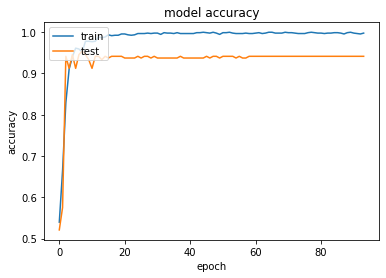

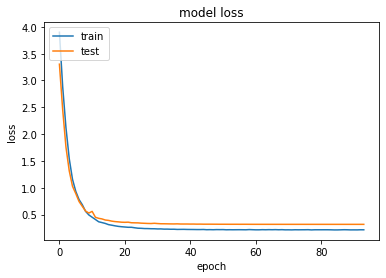

In [91]:
# your code here
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<div class='exercise-r'>

**2.3.4**
    
</div>

In [92]:
# your code here
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [93]:
submit=pd.read_csv('sample_submission.csv')
submit.head()

,id,category
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [94]:
submit.category=y_pred
submit.head()

,id,category
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [95]:
submit.to_csv('file2.csv',index=0)

<div class='exercise-r'>

**2.3.5**
    
</div>

**YOUR KAGGLE LEADERBOARD NAME:**

Team-AI-2_CJ